<a href="https://colab.research.google.com/github/wjtrump/1/blob/main/OCR_with_Pytesseract_and_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR with Pytesseract and OpenCV

Pytesseract is an optical character recognition tool for Python that is used to extract text from images. It is a wrapper for Google’s Tesseract-OCR Engine and supports a wide variety of languages.

| Code Credits | Link |
| ----------- | ---- |
| 🎉 Repository | [![GitHub Repository](https://img.shields.io/github/stars/madmaze/pytesseract?style=social)](https://github.com/madmaze/pytesseract) |
| 🚀 Online inference | [![Hugging Face Spaces](https://img.shields.io/badge/%F0%9F%A4%97%20Hugging%20Face-Spaces-blue)](https://huggingface.co/spaces/radames/hello-pytesseract) |
| 🔥 Discover More Colab Notebooks | [![GitHub Repository](https://img.shields.io/badge/GitHub-Repository-black?style=flat-square&logo=github)](https://github.com/R3gm/InsightSolver-Colab/) |

In [1]:
!sudo apt install tesseract-ocr libtesseract-dev
!pip -q install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev tesseract-ocr
  tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 6 newly installed, 0 to remove and 49 not upgraded.
Need to get 8,560 kB of archives.
After this operation, 31.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.1 [582 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:5 http://arc

In [2]:
import cv2
import pytesseract

img = cv2.imread('/content/maxresdefault.jpg')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'Te ;\n| an\nDEI ARPA\nBORIS JOHNSON”\n\x0c'

## Preprocessing for Tesseract

In [48]:
import cv2
import numpy as np

img = cv2.imread('/content/maxresdefault.jpg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)


In [49]:
img = cv2.imread('/content/maxresdefault.jpg')

gray = get_grayscale(img)
thresh = thresholding(gray)
canny = canny(gray)


In [5]:
# this is only for google colab, the original is cv2.imshow()
from google.colab.patches import cv2_imshow

### results of OCR with preprocessing

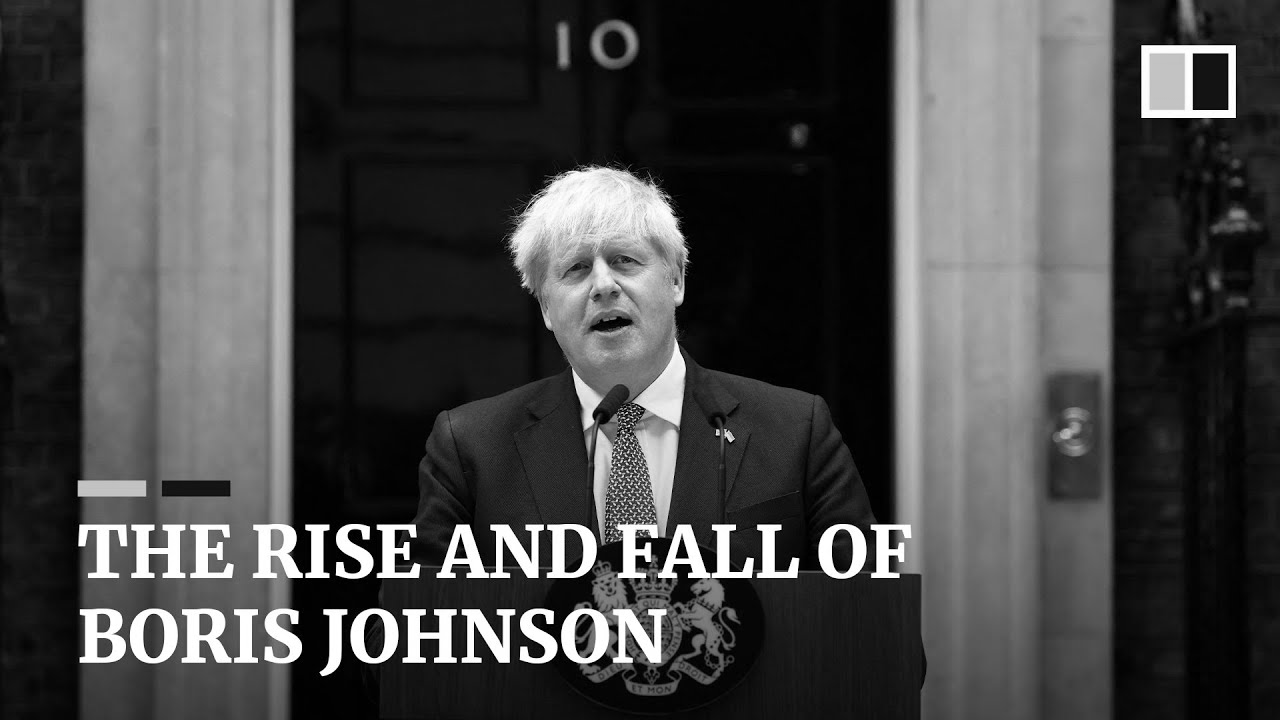

'10 oa\n, fe . A\nWs 1Dp URBAN DN VA ALO)\nPOAC SOE NU\n\x0c'

In [6]:
img = gray
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

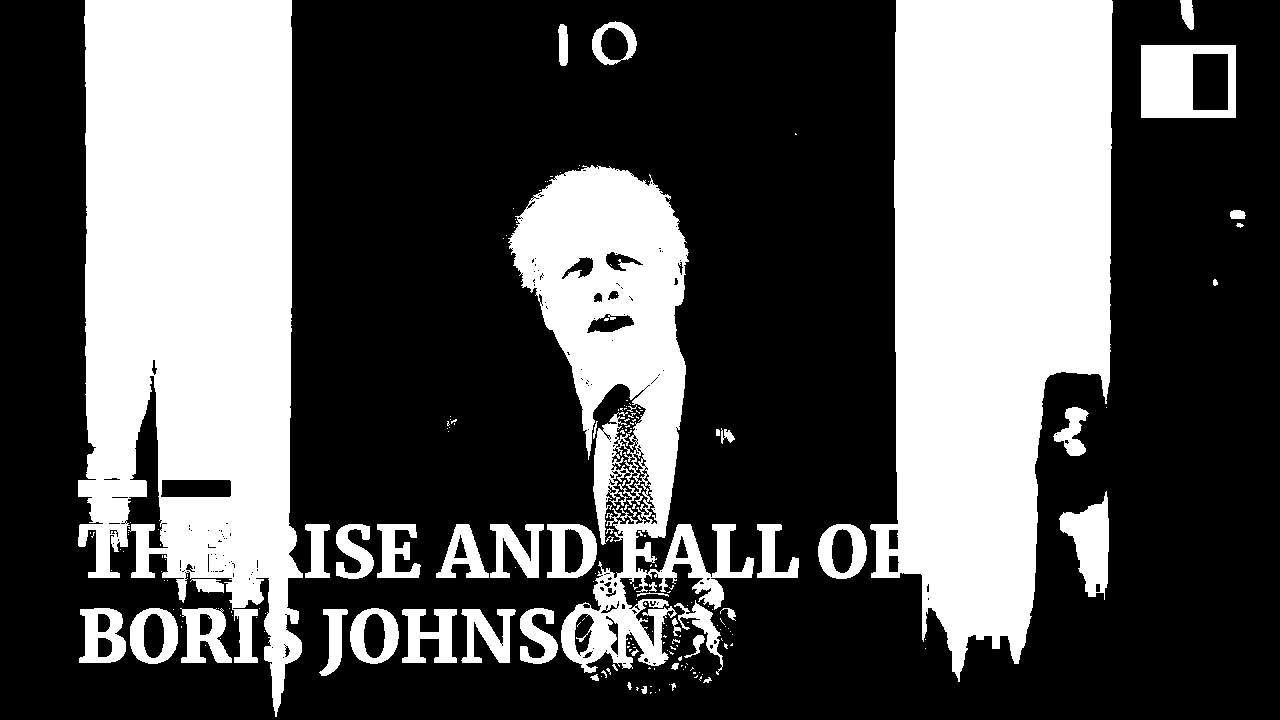

"10 val\n4 , P\nii TNA:\nBORI$ JOHNSGN'S\n\x0c"

In [7]:
img = thresh
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

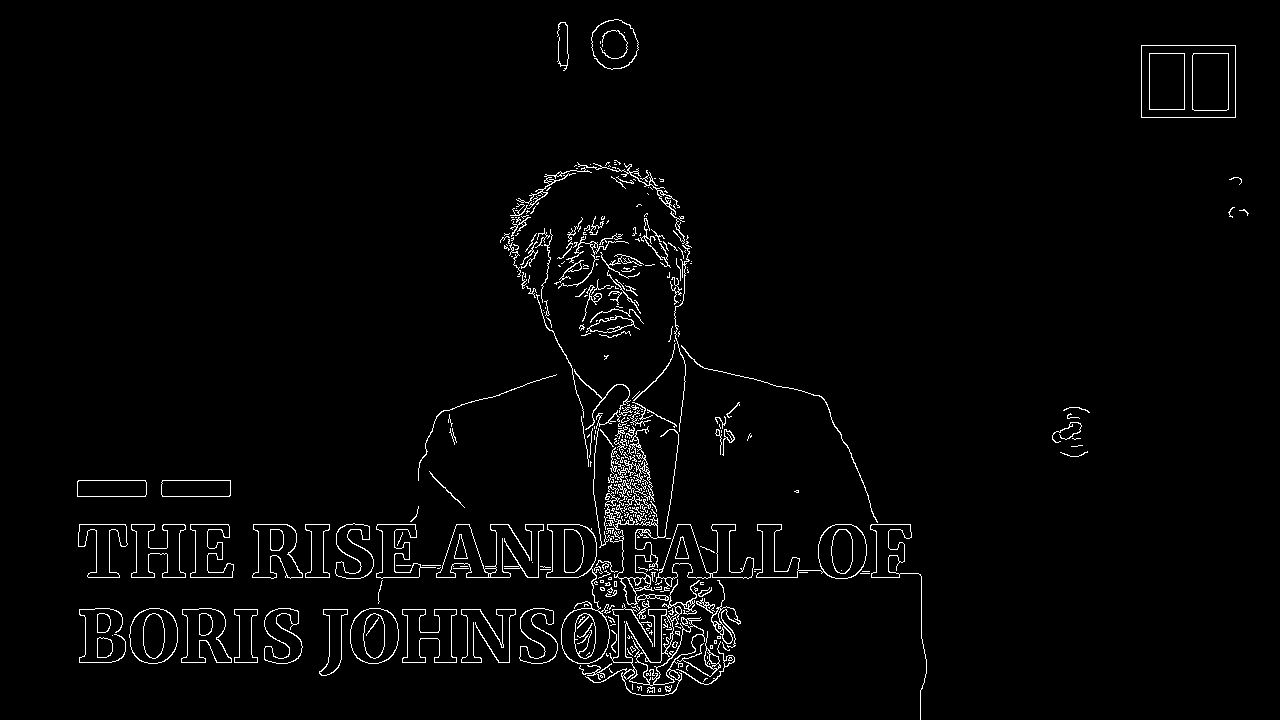

'it?\nIM ere ‘AIO\nBORIS JOHINS@\n\x0c'

In [50]:
img = canny
cv2_imshow(img)
# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

## keys

In [10]:
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('/content/maxresdefault.jpg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


## Getting boxes around text

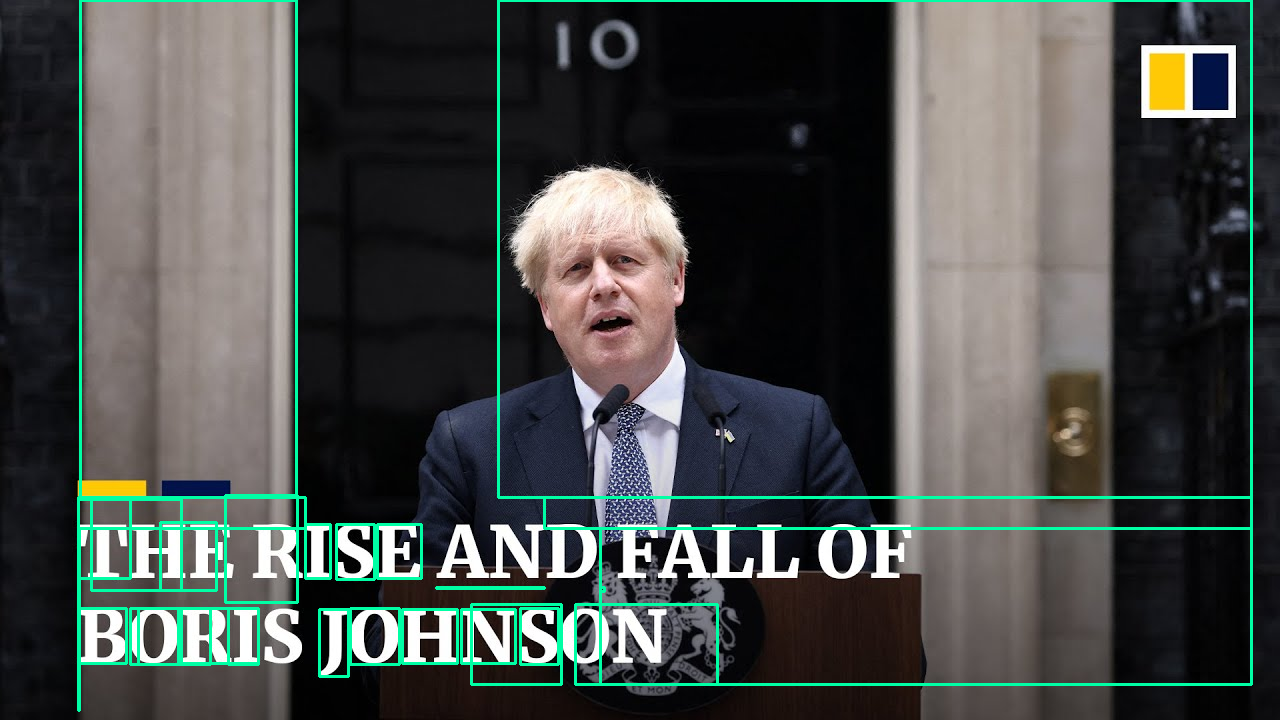

-1

In [51]:
import cv2
import pytesseract

img = cv2.imread('/content/maxresdefault.jpg')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (165, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)


## Getting boxes around text words

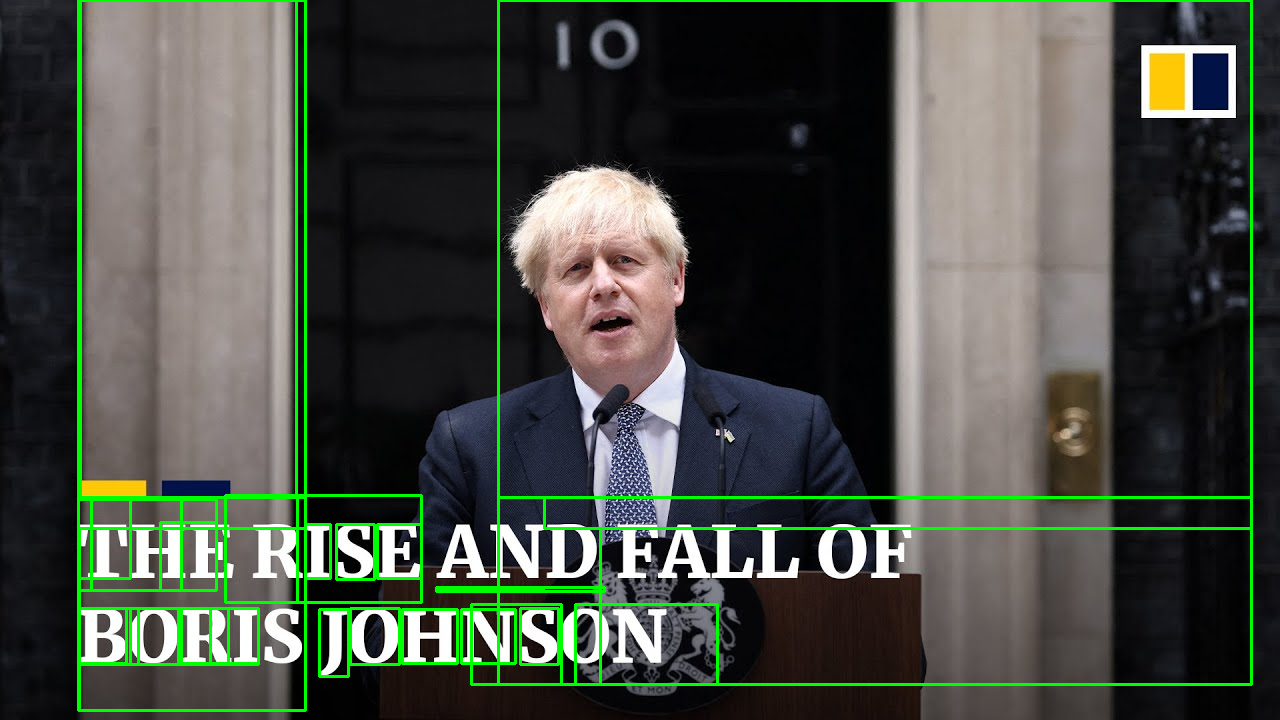

-1

In [12]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img)
cv2.waitKey(0)


## Text template matching

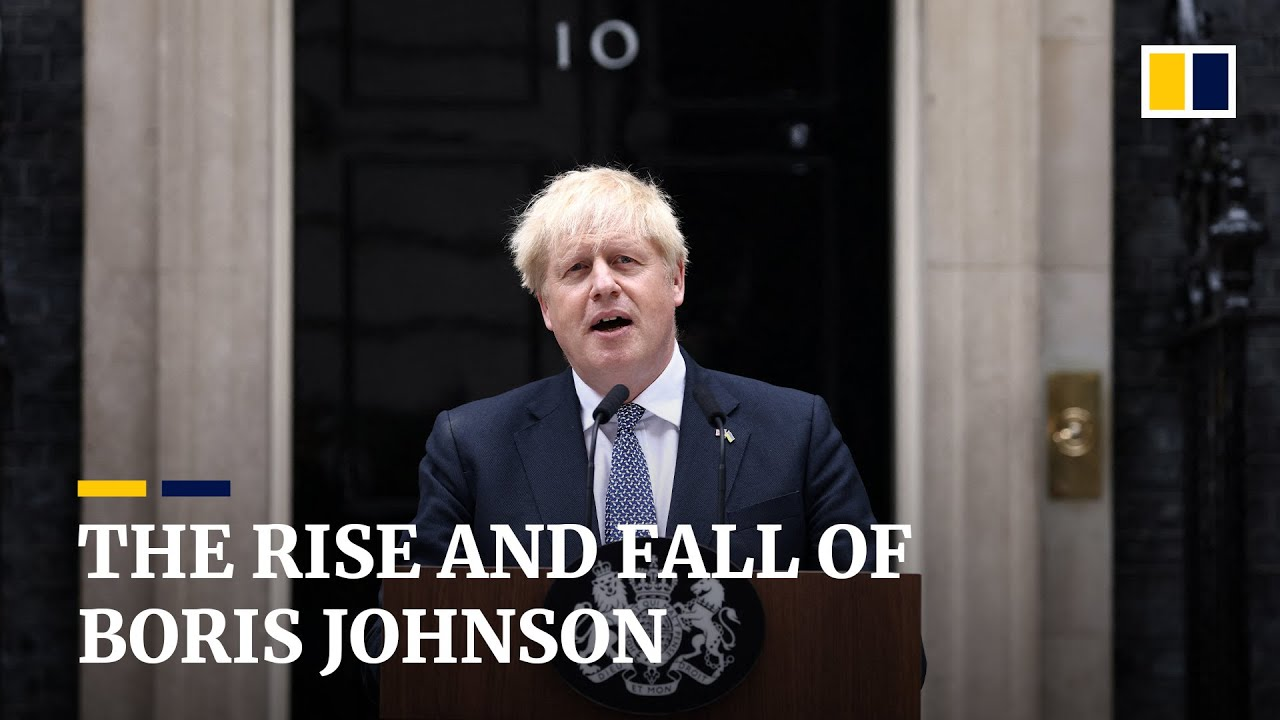

In [52]:
import re
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('/content/maxresdefault.jpg')
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow( img)


## Custom detection, only numbers

## Blacklisting characters

## Select language

In [16]:
!tesseract --list-langs

List of available languages (2):
eng
osd


In [17]:
custom_config = r'-l eng --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'Te ;\n| an\nDEI ARPA\nBORIS JOHNSON”\n\x0c'

## Detection in multiple languages

Download languages here https://github.com/tesseract-ocr/tessdoc/blob/main/Data-Files-in-different-versions.md

In [ ]:
!sudo apt-get install tesseract-ocr-grc
!sudo apt-get install tesseract-ocr-tha

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-grc
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 916 kB of archives.
After this operation, 2,261 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-grc all 1:4.00~git30-7274cfa-1 [916 kB]
Fetched 916 kB in 0s (3,280 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package tesseract-ocr-grc.
(Reading databas

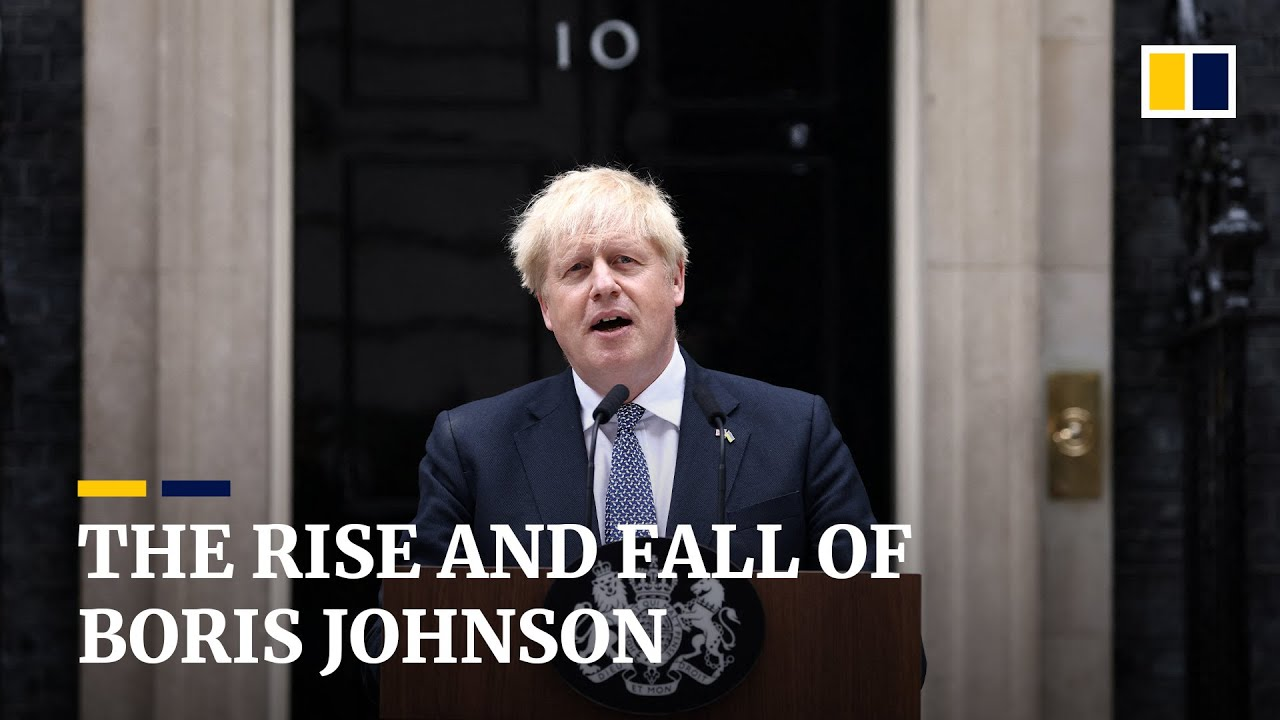

'Te ;\n| an\nDEI ARPA\nBORIS JOHNSON”\n\x0c'

In [53]:
img = cv2.imread('/content/maxresdefault.jpg')
cv2_imshow(img)
# Adding custom options
custom_config = r'-l eng --psm 6'
pytesseract.image_to_string(img, config=custom_config)

## Language detection

In [25]:
!pip -q install langdetect

In [54]:
custom_config = r'-l eng --psm 6'
txt = pytesseract.image_to_string(img, config=custom_config)

from langdetect import detect_langs
detect_langs(txt)

[en:0.999994702664147]

## Script, run in loop for read pages

In [55]:
def read_text_from_image(image):
  """Reads text from an image file and outputs found text to text file"""
  # Convert the image to grayscale
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Perform OTSU Threshold
  ret, thresh = cv2.threshold(gray_image, 60, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

  rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18))

  dilation = cv2.dilate(thresh, rect_kernel, iterations = 1)

  contours, hierachy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  image_copy = image.copy()

  for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)

    cropped = image_copy[y : y + h, x : x + w]

    file = open("results.txt", "a")

    text = pytesseract.image_to_string(cropped)

    file.write(text)
    file.write("\n")

  file.close()



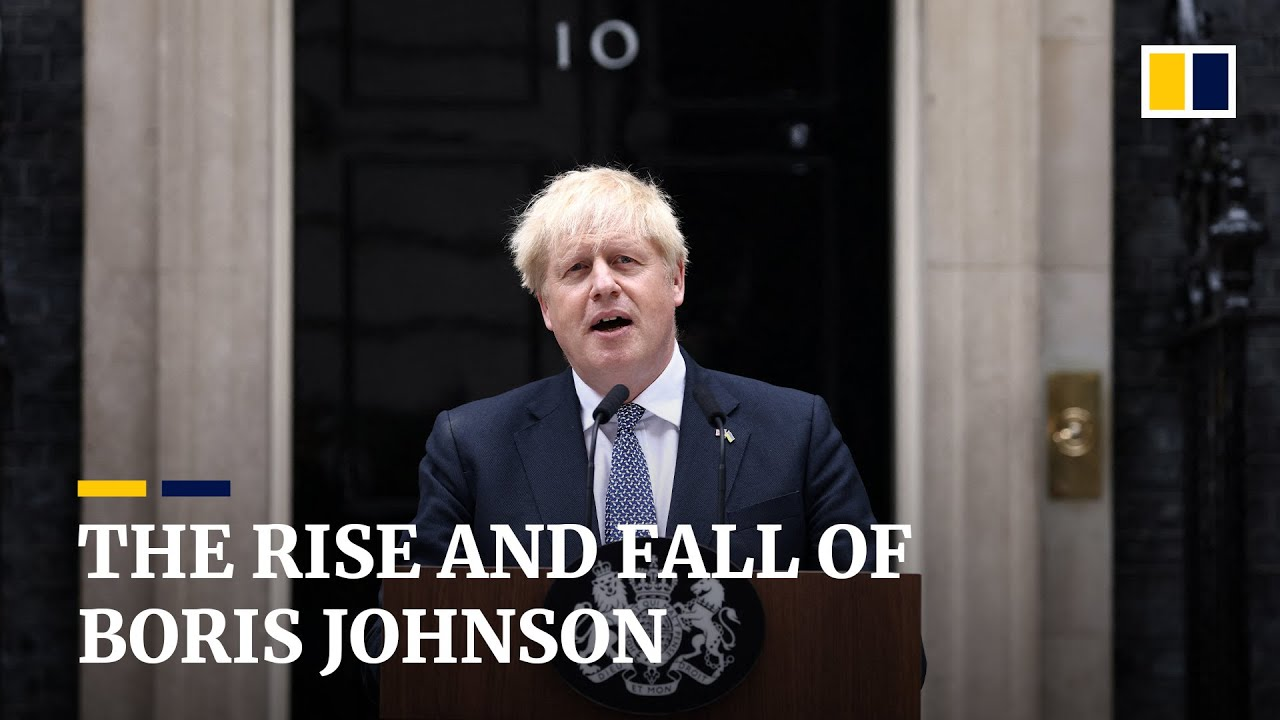



BORIS JOHNSON

THE RISE AND



   



   



BORIS JOHNSON

THE RISE AND



   



   



BORIS JOHNSON

THE RISE AND



   



   



BORIS JOHNSON

THE RISE AND 



   



   



In [56]:
image = cv2.imread("/content/maxresdefault.jpg")
read_text_from_image(image)

# OCR results
cv2_imshow(image)
f = open("results.txt", "r")
lines = f.readlines()
lines.reverse()
for line in lines:
    print(line)
f.close()